LOAN ELIGIBILITY PREDICTION


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv("C:/Users/kasyoki/OneDrive/Desktop/loan.csv")

In [4]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [5]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
print(data.columns)


Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [8]:
data.describe

<bound method NDFrame.describe of       Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849        

In [9]:
duplicate_rows = data[data.duplicated()]

# Print duplicate rows, if any
if not duplicate_rows.empty:
    print("Duplicate Rows:")
    print(duplicate_rows)
else:
    print("No duplicate rows found.")

# Remove duplicates
data_no_duplicates = data.drop_duplicates()

# Check the shape of the dataset after removing duplicates
print("Shape of dataset after removing duplicates:", data_no_duplicates.shape)


No duplicate rows found.
Shape of dataset after removing duplicates: (614, 13)


In [10]:
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

# Display the preprocessed data
print("\nPreprocessed Data:\n", data.head())


Missing Values:
 Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Preprocessed Data:
     Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2        

In [11]:
data_cleaned = data.dropna()

# Display the head of the cleaned DataFrame
print("Head of cleaned DataFrame after removing rows with missing values:")
print(data_cleaned.head(5))

Head of cleaned DataFrame after removing rows with missing values:
    Loan_ID Gender Married Dependents     Education Self_Employed  \
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   
5  LP001011   Male     Yes          2      Graduate           Yes   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   
5             5417             4196.0       267.0             360.0   

   Credit_History Property_Area Loan_Status  
1             1.0         Rural           N  

In [12]:
missing_values = data_cleaned.isnull().sum()
print("Missing Values:\n", missing_values)

# Display the preprocessed data
print("\nPreprocessed Data:\n", data_cleaned.head())


Missing Values:
 Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Preprocessed Data:
     Loan_ID Gender Married Dependents     Education Self_Employed  \
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   
5  LP001011   Male     Yes          2      Graduate           Yes   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583    

In [13]:
sorted_data = data_cleaned.sort_values('Loan_ID', ascending = True).head(10)
sorted_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N
10,LP001024,Male,Yes,2,Graduate,No,3200,700.0,70.0,360.0,1.0,Urban,Y


In [14]:
data.describe()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [15]:
pd.crosstab(data["Credit_History"],data["Loan_Status"],margins=True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


<Axes: >

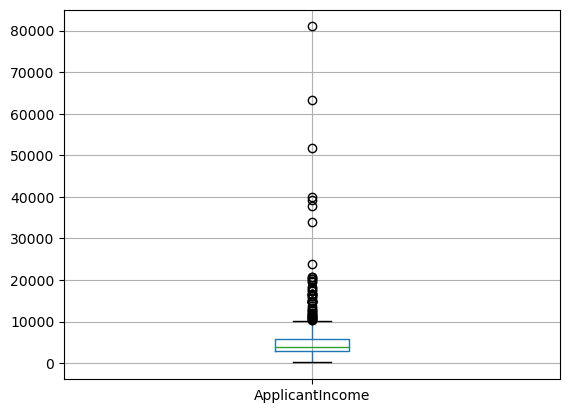

In [16]:
data.boxplot(column="ApplicantIncome")

In [17]:
plt.show()

In [18]:
data["ApplicantIncome"].hist(bins=20)

<Axes: >

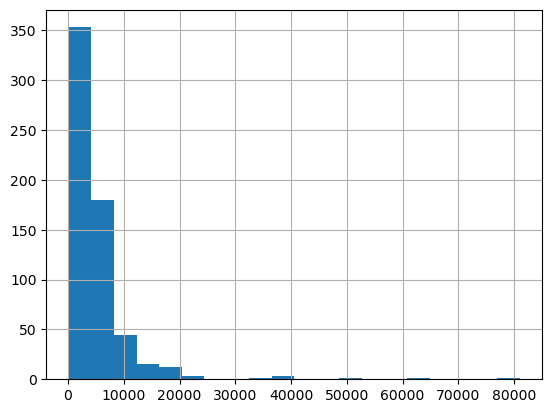

In [19]:
plt.show()

In [20]:
data["CoapplicantIncome"].hist(bins=20)

<Axes: >

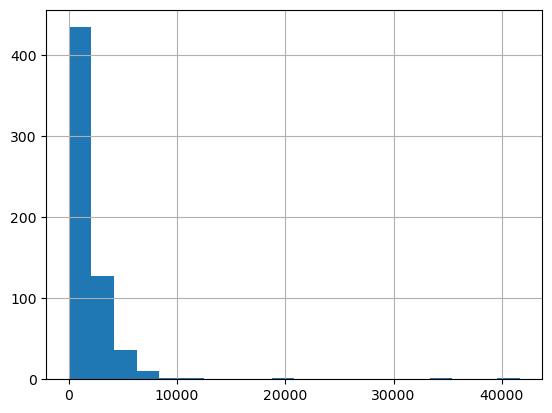

In [21]:
plt.show()

In [22]:
data.boxplot(column="ApplicantIncome", by="Education")

<Axes: title={'center': 'ApplicantIncome'}, xlabel='Education'>

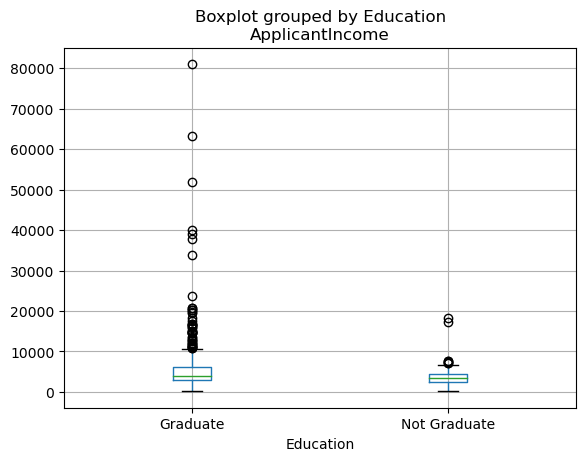

In [23]:
plt.show()

In [24]:
data.boxplot(column="LoanAmount")

<Axes: >

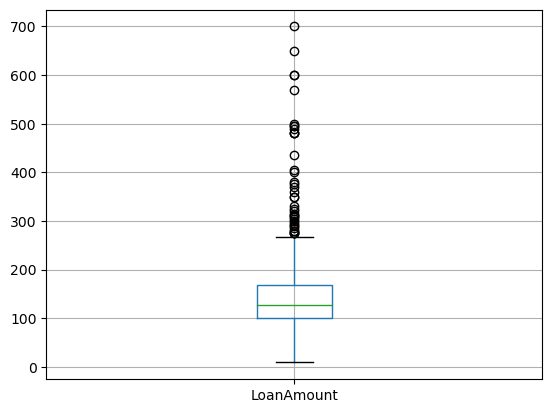

In [25]:
plt.show()

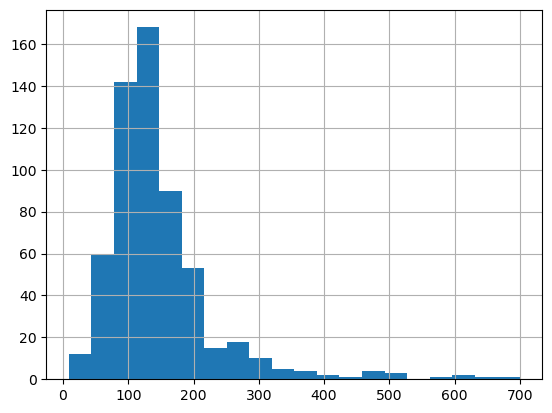

In [26]:
data["LoanAmount"].hist(bins=20)
plt.show()

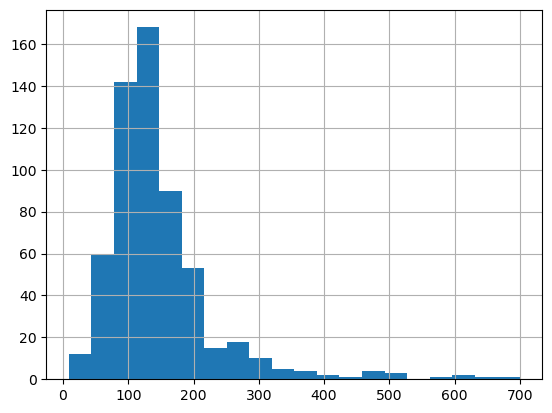

In [27]:
data["LoanAmount"],np.log(data["LoanAmount"])
data["LoanAmount"].hist(bins=20)
plt.show()#nomalization

In [29]:
import seaborn as sns

<Figure size 1000x1000 with 0 Axes>

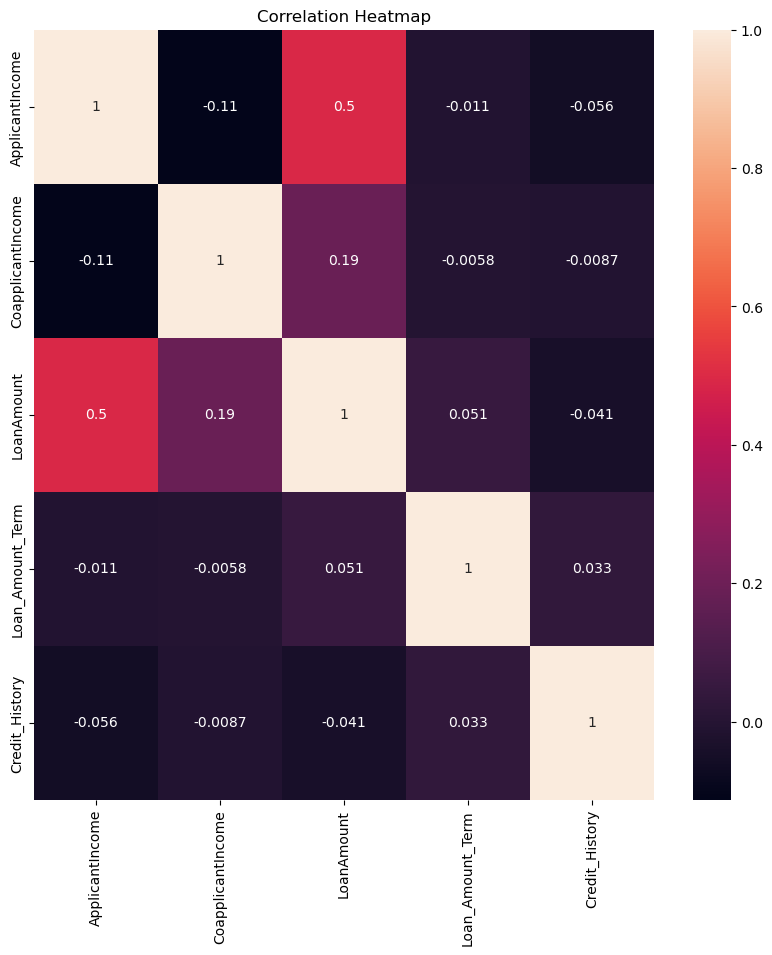

In [30]:
numeric_data = data_cleaned.select_dtypes(include=np.number)

# Plot heatmap of correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(numeric_data.corr(), annot=True)
plt.title('Correlation Heatmap')
plt.show()

In [31]:
# Calculate correlation matrix again
correlation_matrix = numeric_data.corr()
print(correlation_matrix)

                   ApplicantIncome  CoapplicantIncome  LoanAmount  \
ApplicantIncome           1.000000          -0.112588    0.495310   
CoapplicantIncome        -0.112588           1.000000    0.190740   
LoanAmount                0.495310           0.190740    1.000000   
Loan_Amount_Term         -0.010838          -0.005775    0.050867   
Credit_History           -0.056152          -0.008692   -0.040773   

                   Loan_Amount_Term  Credit_History  
ApplicantIncome           -0.010838       -0.056152  
CoapplicantIncome         -0.005775       -0.008692  
LoanAmount                 0.050867       -0.040773  
Loan_Amount_Term           1.000000        0.032937  
Credit_History             0.032937        1.000000  


In [38]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Create a DataFrame with your data
data = {
    'Loan_ID': ['LP001002', 'LP001003', 'LP001005', 'LP001006', 'LP001008'],
    'Gender': ['Male', 'Male', 'Male', 'Male', 'Male'],
    'Married': ['No', 'Yes', 'Yes', 'Yes', 'No'],
    'Dependents': [0, 1, 0, 0, 0],
    'Education': ['Graduate', 'Graduate', 'Graduate', 'Not Graduate', 'Graduate'],
    'Self_Employed': ['No', 'No', 'Yes', 'No', 'No'],
    'ApplicantIncome': [5849, 4583, 3000, 2583, 6000],
    'CoapplicantIncome': [0, 1508, 0, 2358, 0],
    'LoanAmount': [128.0 , 128, 66, 120, 141],
    'Loan_Amount_Term': [360, 360, 360, 360, 360],
    'Credit_History': [1, 1, 1, 1, 1],
    'Property_Area': ['Urban', 'Rural', 'Urban', 'Urban', 'Urban'],
    'Loan_Status': ['Y', 'N', 'Y', 'Y', 'Y']
}
df = pd.DataFrame(data)

# Select only the numeric columns for normalization
numeric_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

# Perform Min-Max normalization
scaler = MinMaxScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

print(df)


    Loan_ID Gender Married  Dependents     Education Self_Employed  \
0  LP001002   Male      No           0      Graduate            No   
1  LP001003   Male     Yes           1      Graduate            No   
2  LP001005   Male     Yes           0      Graduate           Yes   
3  LP001006   Male     Yes           0  Not Graduate            No   
4  LP001008   Male      No           0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0         0.955809           0.000000    0.826667               360   
1         0.585309           0.639525    0.826667               360   
2         0.122037           0.000000    0.000000               360   
3         0.000000           1.000000    0.720000               360   
4         1.000000           0.000000    1.000000               360   

   Credit_History Property_Area Loan_Status  
0               1         Urban           Y  
1               1         Rural           N  
2             

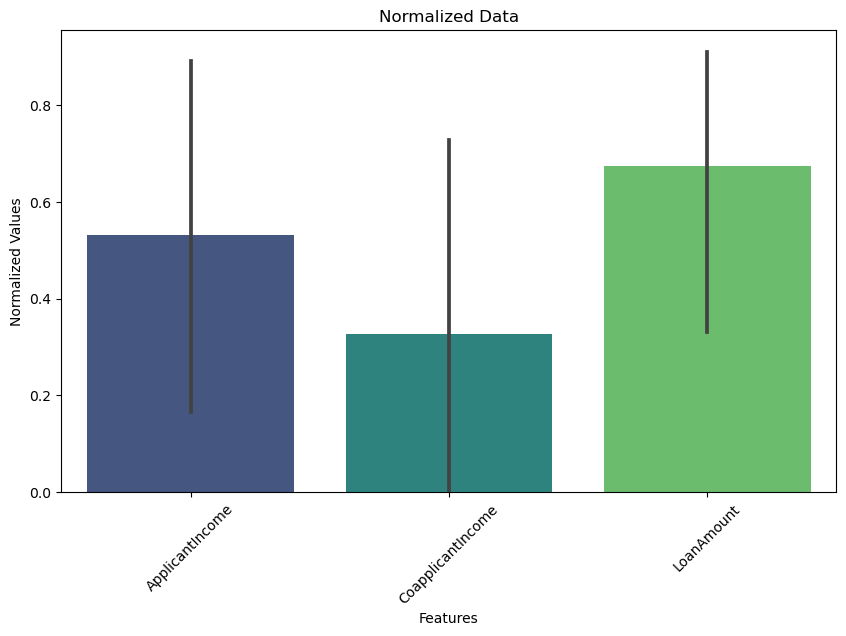

In [39]:
numeric_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

# Perform Min-Max normalization
scaler = MinMaxScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# Plot the normalized data
plt.figure(figsize=(10, 6))
sns.barplot(data=df[numeric_columns], palette='viridis')
plt.title('Normalized Data')
plt.xlabel('Features')
plt.ylabel('Normalized Values')
plt.xticks(rotation=45)
plt.show()

In [40]:
# Define the features (independent variables)
X = df.drop(columns=['Loan_ID', 'Loan_Status'])

# Define the target variable (dependent variable)
y = df['Loan_Status']

print("Independent variables (features):")
print(X.head())

print("\nDependent variable (target):")
print(y.head())


Independent variables (features):
  Gender Married  Dependents     Education Self_Employed  ApplicantIncome  \
0   Male      No           0      Graduate            No         0.955809   
1   Male     Yes           1      Graduate            No         0.585309   
2   Male     Yes           0      Graduate           Yes         0.122037   
3   Male     Yes           0  Not Graduate            No         0.000000   
4   Male      No           0      Graduate            No         1.000000   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0           0.000000    0.826667               360               1   
1           0.639525    0.826667               360               1   
2           0.000000    0.000000               360               1   
3           1.000000    0.720000               360               1   
4           0.000000    1.000000               360               1   

  Property_Area  
0         Urban  
1         Rural  
2         Urban  
3         

In [41]:
X = df.drop(columns=['Loan_ID', 'Loan_Status'])  # Independent variables (features)
y = df['Loan_Status']  # Dependent variable (target)

print("Independent Variables (Features):\n", X.head())
print("\nDependent Variable (Target):\n", y.head())

Independent Variables (Features):
   Gender Married  Dependents     Education Self_Employed  ApplicantIncome  \
0   Male      No           0      Graduate            No         0.955809   
1   Male     Yes           1      Graduate            No         0.585309   
2   Male     Yes           0      Graduate           Yes         0.122037   
3   Male     Yes           0  Not Graduate            No         0.000000   
4   Male      No           0      Graduate            No         1.000000   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0           0.000000    0.826667               360               1   
1           0.639525    0.826667               360               1   
2           0.000000    0.000000               360               1   
3           1.000000    0.720000               360               1   
4           0.000000    1.000000               360               1   

  Property_Area  
0         Urban  
1         Rural  
2         Urban  
3        

In [42]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Testing target shape:", y_test.shape)


Training features shape: (4, 11)
Testing features shape: (1, 11)
Training target shape: (4,)
Testing target shape: (1,)


In [50]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Convert target variable 'y_train' to numerical format
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Fit LabelEncoder on both training and testing sets to capture all possible labels
y_combined = pd.concat([y_train, y_test])
label_encoder.fit(y_combined)

# Convert target variable 'y_test' to numerical format
y_test_encoded = label_encoder.transform(y_test)

# Initialize the Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=42)

# Train the model
dt_regressor.fit(X_train, y_train_encoded)

# Make predictions
y_pred_train_dt = dt_regressor.predict(X_train)
y_pred_test_dt = dt_regressor.predict(X_test)

# Mean Squared Error and R2 Score for training set
mse_train_dt = mean_squared_error(y_train_encoded, y_pred_train_dt)
r2_train_dt = r2_score(y_train_encoded, y_pred_train_dt)

# Mean Squared Error and R2 Score for test set
mse_test_dt = mean_squared_error(y_test_encoded, y_pred_test_dt)
r2_test_dt = r2_score(y_test_encoded, y_pred_test_dt)

print("Decision Tree Model Evaluation:")
print("Training Set:")
print("Mean Squared Error:", mse_train_dt)
print("R2 Score:", r2_train_dt)
print("\nTest Set:")
print("Mean Squared Error:", mse_test_dt)
print("R2 Score:", r2_test_dt)


Decision Tree Model Evaluation:
Training Set:
Mean Squared Error: 0.0
R2 Score: 1.0

Test Set:
Mean Squared Error: 0.0
R2 Score: nan


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [55]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Define loan application data
data = {
    'Gender': ['Male', 'Male', 'Female', 'Male', 'Female'],
    'Married': ['Yes', 'Yes', 'Yes', 'No', 'Yes'],
    'Dependents': [1, 0, 2, 1, 0],
    'Education': ['Graduate', 'Graduate', 'Graduate', 'Not Graduate', 'Graduate'],
    'Self_Employed': ['No', 'No', 'Yes', 'No', 'No'],
    'ApplicantIncome': [5849, 4583, 3000, 2583, 6000],
    'CoapplicantIncome': [0, 1508, 0, 2358, 0],
    'LoanAmount': [128, 128, 66, 120, 141],
    'Loan_Amount_Term': [360, 360, 360, 360, 360],
    'Credit_History': [1, 1, 1, 1, 1],
    'Property_Area': ['Urban', 'Rural', 'Urban', 'Urban', 'Urban'],
    'Loan_Status': ['Y', 'N', 'Y', 'Y', 'Y']
}

# Convert dictionary to DataFrame
df = pd.DataFrame(data)

# Perform one-hot encoding for categorical variables
df_encoded = pd.get_dummies(df, columns=['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area'])

# Define features and target variable
X = df_encoded.drop(columns=['Loan_Status'])  # Features
y = df_encoded['Loan_Status']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the model
dt_classifier.fit(X_train, y_train)

# Make predictions on training and testing sets
y_pred_train = dt_classifier.predict(X_train)
y_pred_test = dt_classifier.predict(X_test)

# Evaluate the model
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

# Now, let's predict loan eligibility for a new applicant
# Define new applicant features (replace placeholders with actual values)
new_applicant_features = {
    'Dependents': 1,
    'ApplicantIncome': 5000,
    'CoapplicantIncome': 2000,
    'LoanAmount': 300,
    'Loan_Amount_Term': 360,
    'Credit_History': 1,
    'Gender_Female': 0,
    'Gender_Male': 1,
    'Married_No': 0,
    'Married_Yes': 1,
    'Education_Graduate': 1,
    'Education_Not Graduate': 0,
    'Self_Employed_No': 1,
    'Self_Employed_Yes': 0,
    'Property_Area_Rural': 0,
    'Property_Area_Urban': 1
}

# Convert new applicant features to DataFrame
new_applicant_df = pd.DataFrame([new_applicant_features])

# Make predictions for the new applicant
predicted_loan_status = dt_classifier.predict(new_applicant_df)

print("Predicted Loan Status for New Applicant:", predicted_loan_status[0])


Training Accuracy: 1.0
Test Accuracy: 0.0
Predicted Loan Status for New Applicant: Y
